In [1]:
#Imports 
from matplotlib import pyplot as plt
from tqdm import tqdm 
import pandas as pd 

In [2]:
#Read data
flights = pd.read_csv('../../data/Airports2.csv')

In [3]:
flights['Fly_date'] = pd.to_datetime(flights['Fly_date'])

In [4]:
flights['dstate'] = flights['Destination_city'].apply(lambda x: x[-2:])
flights['ostate'] = flights['Origin_city'].apply(lambda x: x[-2:])

In [5]:
state_counts = pd.concat([flights['dstate'].value_counts(), flights['dstate'].value_counts()], axis=1)

In [6]:
state_counts

,dstate,dstate
TX,336410,336410
CA,251405,251405
FL,241308,241308
IL,207617,207617
OH,190293,190293
NY,179115,179115
PA,179019,179019
NC,146748,146748
GA,146614,146614
MI,139979,139979


In [7]:
flights['month'] = flights['Fly_date'].dt.month
flights['year'] = flights['Fly_date'].dt.year

In [8]:
fl = flights.loc[flights['dstate']=='CO', 'Destination_airport']

fl.value_counts()[:10]

COS    9089
GJT    1854
DRO     985
PUB     740
MTJ     737
AMK      12
STK       1
Name: Destination_airport, dtype: int64

In [15]:
flights.loc[flights['dstate']=='LA', 'Destination_airport'].unique()

array(['HUM', 'MLU', 'RSN', 'LFT', 'ESF', 'AEX', 'ARA', 'SHV', 'BAD',
       'DTN', 'BTR', 'MSY', 'NEW', 'NBG', 'LCH', 'WQM'], dtype=object)

In [16]:
flights.loc[flights['dstate']=='CO', 'Destination_airport'].unique()

array(['PUB', 'DRO', 'AMK', 'MTJ', 'STK', 'GJT', 'COS'], dtype=object)

interactive(children=(Text(value='FL', description='state'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_state_trends(state)>

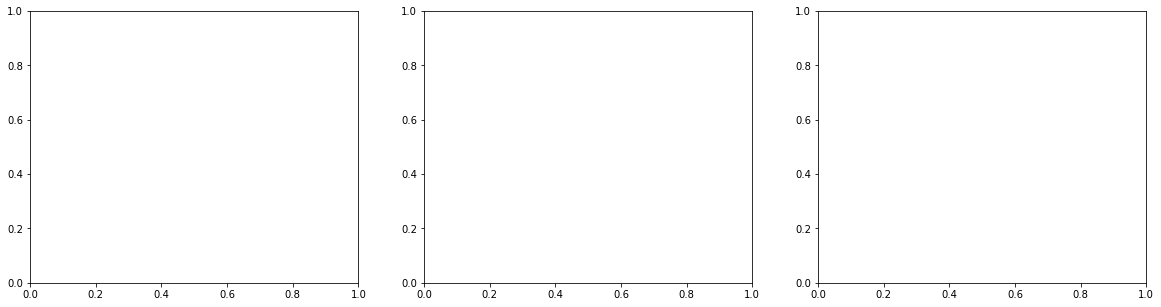

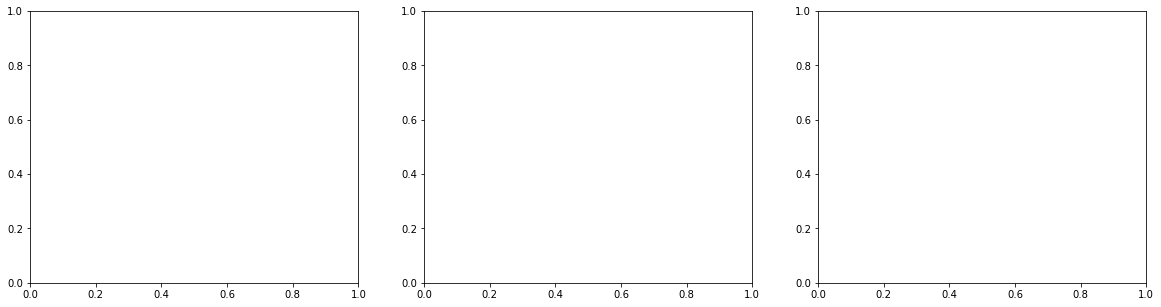

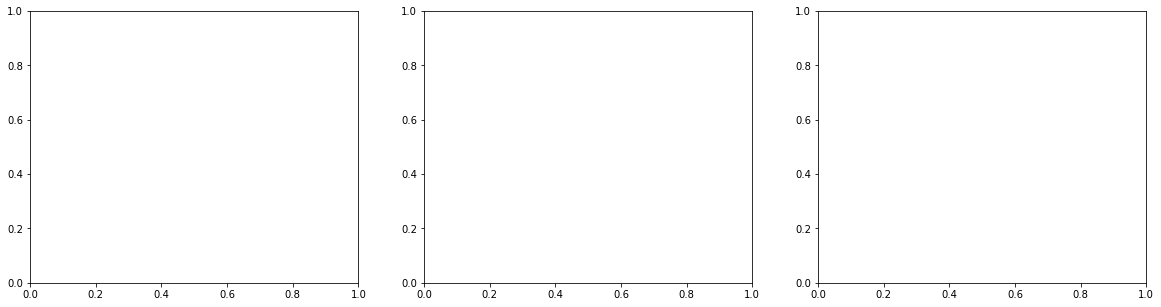

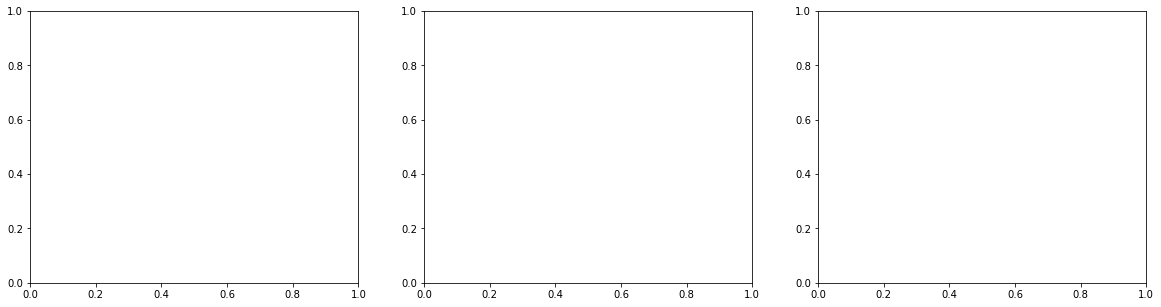

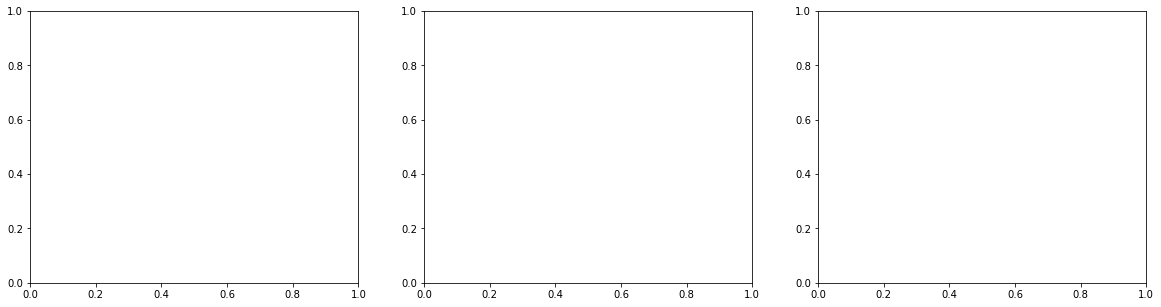

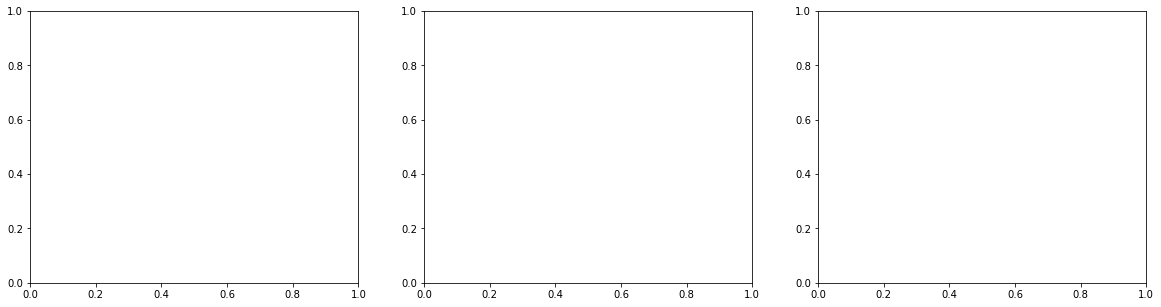

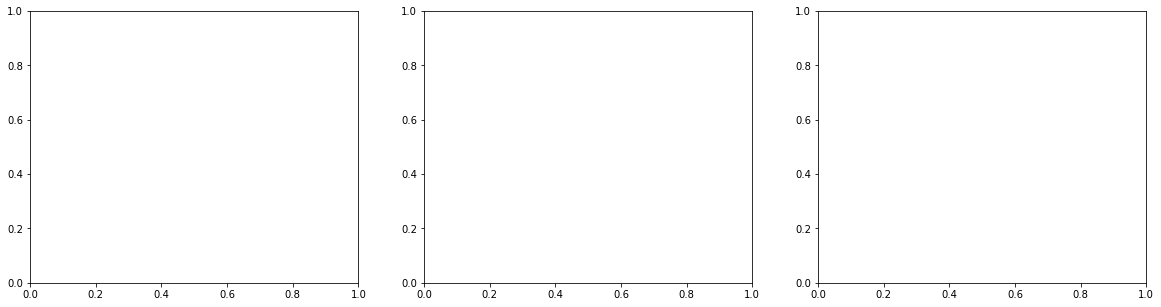

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_state_trends(state):

    plt.close()

    filtered = flights[flights['year'] == 1990]

    filtered = filtered[filtered['ostate'] == state]

    top10 = filtered['Destination_airport'].value_counts()[:10].index

    sums = filtered.groupby(['year', 'month']).sum().reset_index()

    fcount      = sums.groupby('month').apply(lambda x: pd.Series({'mean': x['Flights'].mean(), 'sem': x['Flights'].sem()}))
    passcount   = sums.groupby('month').apply(lambda x: pd.Series({'mean': x['Passengers'].mean(), 'sem': x['Passengers'].sem()}))
    seatcount   = sums.groupby('month').apply(lambda x: pd.Series({'mean': x['Seats'].mean(), 'sem': x['Seats'].sem()}))

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    axs[0].errorbar(x=fcount.index, y=fcount['mean'], marker='s', yerr=fcount['sem'])
    axs[0].set_xticks(range(1, 13), months);
    axs[0].set_title('Flights counts for %s' % state);
    axs[0].grid()

    axs[1].errorbar(x=fcount.index, y=passcount['mean'], marker='s', yerr=passcount['sem'])
    axs[1].set_xticks(range(1, 13), months);
    axs[1].set_title('Passengers counts for %s' % state);
    axs[1].grid()

    axs[2].errorbar(x=fcount.index, y=seatcount['mean'], marker='s', yerr=seatcount['sem'])
    axs[2].set_xticks(range(1, 13), months);
    axs[2].set_title('Seats counts for %s' % state);
    axs[2].grid()

interact(plot_state_trends, state='FL')